<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/1102_into_the_mind_of_a_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train, x_test = x_train / 255., x_test / 255.
x_train = x_train.reshape(*x_train.shape, 1)
x_test = x_test.reshape(*x_test.shape, 1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test =  keras.utils.to_categorical(y_test, 10)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


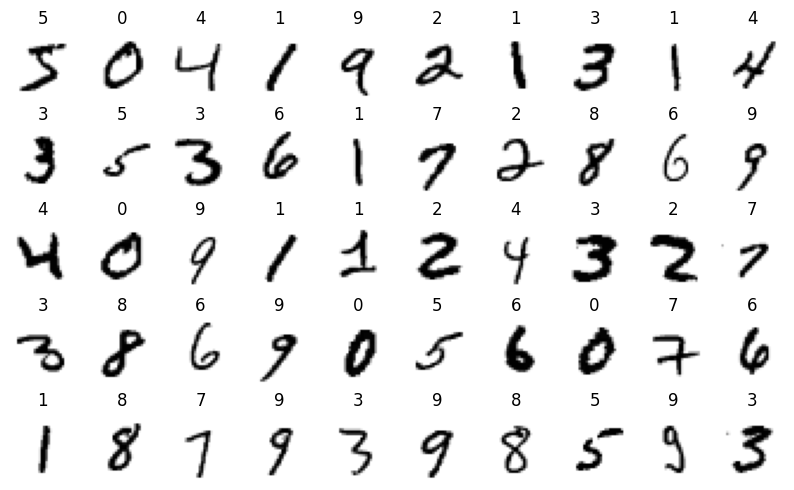

In [4]:
plt.figure(figsize=(10, 6))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis("off")
    plt.imshow(x_train[i], cmap="gray_r")
    plt.title(np.argmax(y_train[i]))
plt.show()

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [6]:
batch_size=128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/15
469/469 [==============================] - 35s 72ms/step - loss: 0.4621 - accuracy: 0.8538
Epoch 2/15
469/469 [==============================] - 35s 74ms/step - loss: 0.1761 - accuracy: 0.9481
Epoch 3/15
469/469 [==============================] - 32s 69ms/step - loss: 0.1340 - accuracy: 0.9612
Epoch 4/15
469/469 [==============================] - 36s 76ms/step - loss: 0.1150 - accuracy: 0.9663
Epoch 5/15
469/469 [==============================] - 31s 65ms/step - loss: 0.1008 - accuracy: 0.9709
Epoch 6/15
469/469 [==============================] - 37s 80ms/step - loss: 0.0904 - accuracy: 0.9732
Epoch 7/15
469/469 [==============================] - 33s 70ms/step - loss: 0.0826 - accuracy: 0.9758
Epoch 8/15
469/469 [==============================] - 34s 73ms/step - loss: 0.0809 - accuracy: 0.9767
Epoch 9/15
469/469 [==============================] - 35s 74ms/step - loss: 0.0733 - accuracy: 0.9778
Epoch 10/15
469/469 [==============================] - 32s 68ms/step - loss: 0.071

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0221 - accuracy: 0.9927


[0.02208547107875347, 0.9926999807357788]

In [8]:
model.save("model.h5")

In [9]:
!ls -lh

total 1.5M
-rw-r--r-- 1 root root 1.5M Jun  5 18:32 model.h5
drwxr-xr-x 1 root root 4.0K Jun  2 13:39 sample_data


In [10]:
type(model.layers)

list

In [11]:
len(model.layers)

9

In [12]:
type(model.layers[0])

keras.layers.convolutional.conv2d.Conv2D

In [13]:
def conv2d(mat, kernel):
    kn, km, ko = kernel.shape
    n, m, _ = mat.shape
    rn, rm = n - kn + 1, m - km + 1
    res = np.zeros((rn, rm))
    sumk = np.sum(kernel)
    for i in range(rn):
        for j in range(rm):
            rr = 0
            for p in range(kn):
                for q in range(km):
                    for r in range(ko):
                        rr += mat[i, j, r] * kernel[p, q, r]
            res[i, j] = rr / sumk
    return res

In [14]:
def maxpool(mat, side, stride):
    n, m = mat.shape
    nn, mm = n // stride, m // stride
    res = np.zeros((nn, mm))
    for i in range(nn):
        for j in range(mm):
            res[i, j] = np.max(mat[i*side:(i+1)*side, j*side:(j+1)*side])
    return res

In [15]:
k = np.array(model.layers[0].kernel[:,:,:, 0])
print(k.shape)

(3, 3, 1)


In [16]:
k = np.array(model.layers[2].kernel[:,:,:, 0])
print(k.shape)

(3, 3, 32)


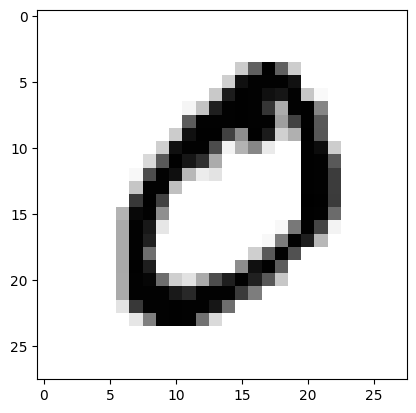

In [17]:
imidx=1
plt.imshow(x_train[imidx], cmap="gray_r")

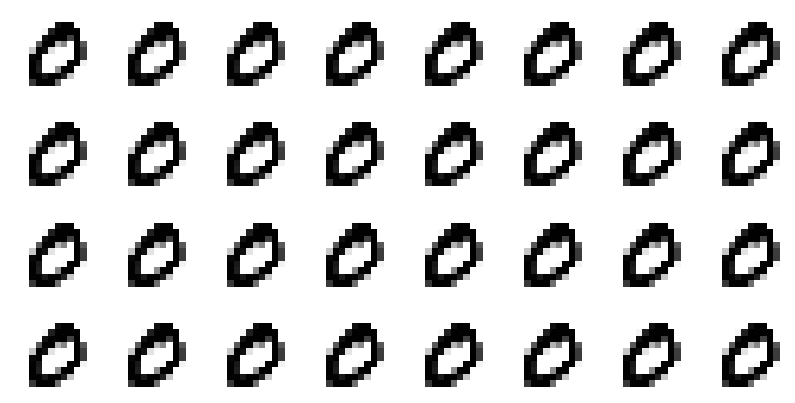

In [19]:
plt.figure(figsize=(10, 5))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.axis("off")
    kernel = np.array(model.layers[0].kernel[:,:,:, i])
    img = conv2d(x_train[imidx], kernel)
    img = maxpool(img, 2, 2)
    plt.imshow(img, cmap="gray_r")
plt.show()

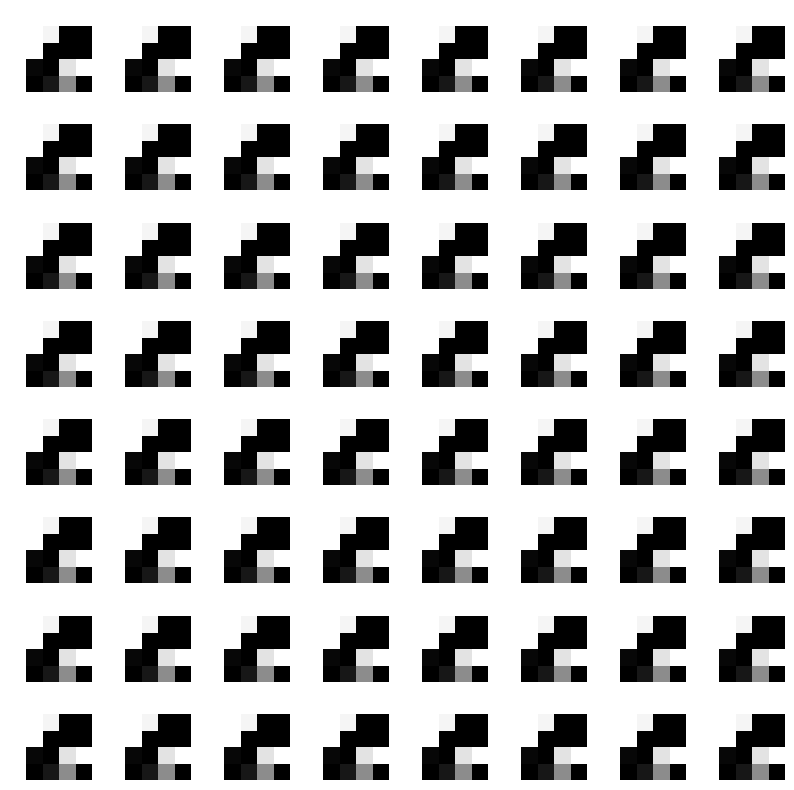

In [24]:
img = np.zeros((13, 13, 32))
for i in range(32):
    kernel = np.array(model.layers[0].kernel[:,:,:, i])
    imbase = conv2d(x_train[imidx], kernel)
    img[:,:,i] = maxpool(imbase, 2, 2)

plt.figure(figsize=(10, 10))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.axis("off")
    kernel = np.array(model.layers[2].kernel[:,:,:, i])
    imbase = conv2d(img, kernel)
    imbase = maxpool(imbase, 2, 2)
    plt.imshow(imbase, cmap="gray_r")
plt.show()